In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from citipy import citipy

In [3]:
import requests

from config import weather_api_key

In [4]:
import time
from datetime import datetime

In [5]:
lats = np.random.uniform(low=-90.000, high=90.000, size=50)
lngs = np.random.uniform(low=-180.000, high=180.000, size=50)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
coordinates = list(lat_lngs)

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
cities

['bukachacha',
 'ushuaia',
 'bethel',
 'esperance',
 'luancheng',
 'tabou',
 'yellowknife',
 'new norfolk',
 'nanortalik',
 'mataura',
 'barrow',
 'bluff',
 'cozumel',
 'carnarvon',
 'cape town',
 'cabo san lucas',
 'punta arenas',
 'vaini',
 'koumac',
 'luderitz',
 'tasiilaq',
 'saint george',
 'phalaborwa',
 'karia',
 'isangel',
 'kinablangan',
 'gao',
 'mao',
 'busselton',
 'wick',
 'sorong',
 'tiksi',
 'ancud',
 'pisco',
 'castro',
 'ayagoz',
 'athabasca',
 'ambodifototra',
 'qaqortoq',
 'harper',
 'mar del plata',
 'grand-santi']

In [9]:
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

for i, city in enumerate(cities):
    if i%50==0 and i >= 50: 
        set_count += 1
        record_count = 1
        time.sleep(60)
    city_url = url + "&q=" + city.replace(" ","+")
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1
    
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bukachacha
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | esperance
Processing Record 5 of Set 1 | luancheng
Processing Record 6 of Set 1 | tabou
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | nanortalik
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | cozumel
Processing Record 14 of Set 1 | carnarvon
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | cabo san lucas
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | koumac
Processing Record 20 of Set 1 | luderitz
Processing Record 21 of Set 1 | tasiilaq
Processing Record 22 of Set 1 | saint george
Processing Record 23 of Set 1 | phala

In [10]:
city_data

[{'City': 'Bukachacha',
  'Lat': 52.9833,
  'Lng': 116.9167,
  'Max Temp': 53.26,
  'Humidity': 49,
  'Cloudiness': 36,
  'Wind Speed': 7.07,
  'Country': 'RU',
  'Date': '2022-09-21 04:04:40'},
 {'City': 'Ushuaia',
  'Lat': -54.8,
  'Lng': -68.3,
  'Max Temp': 35.1,
  'Humidity': 93,
  'Cloudiness': 85,
  'Wind Speed': 8.57,
  'Country': 'AR',
  'Date': '2022-09-21 04:00:46'},
 {'City': 'Bethel',
  'Lat': 41.3712,
  'Lng': -73.414,
  'Max Temp': 63.75,
  'Humidity': 78,
  'Cloudiness': 0,
  'Wind Speed': 3.94,
  'Country': 'US',
  'Date': '2022-09-21 04:01:12'},
 {'City': 'Esperance',
  'Lat': -33.8667,
  'Lng': 121.9,
  'Max Temp': 67.26,
  'Humidity': 50,
  'Cloudiness': 0,
  'Wind Speed': 11.23,
  'Country': 'AU',
  'Date': '2022-09-21 04:04:41'},
 {'City': 'Luancheng',
  'Lat': 37.8792,
  'Lng': 114.6517,
  'Max Temp': 79.29,
  'Humidity': 37,
  'Cloudiness': 2,
  'Wind Speed': 6.58,
  'Country': 'CN',
  'Date': '2022-09-21 04:04:41'},
 {'City': 'Tabou',
  'Lat': 4.423,
  'Lng': -

In [11]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bukachacha,52.9833,116.9167,53.26,49,36,7.07,RU,2022-09-21 04:04:40
1,Ushuaia,-54.8000,-68.3000,35.10,93,85,8.57,AR,2022-09-21 04:00:46
2,Bethel,41.3712,-73.4140,63.75,78,0,3.94,US,2022-09-21 04:01:12
3,Esperance,-33.8667,121.9000,67.26,50,0,11.23,AU,2022-09-21 04:04:41
4,Luancheng,37.8792,114.6517,79.29,37,2,6.58,CN,2022-09-21 04:04:41
5,Tabou,4.4230,-7.3528,75.25,88,100,7.56,CI,2022-09-21 04:04:42
6,Yellowknife,62.4560,-114.3525,44.56,93,27,8.01,CA,2022-09-21 04:00:33
7,New Norfolk,-42.7826,147.0587,66.70,40,72,1.97,AU,2022-09-21 04:04:42
8,Nanortalik,60.1432,-45.2371,39.60,90,11,17.63,GL,2022-09-21 04:04:43
9,Mataura,-46.1927,168.8643,55.40,71,82,2.39,NZ,2022-09-21 04:04:43


In [12]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bukachacha,RU,2022-09-21 04:04:40,52.9833,116.9167,53.26,49,36,7.07
1,Ushuaia,AR,2022-09-21 04:00:46,-54.8000,-68.3000,35.10,93,85,8.57
2,Bethel,US,2022-09-21 04:01:12,41.3712,-73.4140,63.75,78,0,3.94
3,Esperance,AU,2022-09-21 04:04:41,-33.8667,121.9000,67.26,50,0,11.23
4,Luancheng,CN,2022-09-21 04:04:41,37.8792,114.6517,79.29,37,2,6.58
5,Tabou,CI,2022-09-21 04:04:42,4.4230,-7.3528,75.25,88,100,7.56
6,Yellowknife,CA,2022-09-21 04:00:33,62.4560,-114.3525,44.56,93,27,8.01
7,New Norfolk,AU,2022-09-21 04:04:42,-42.7826,147.0587,66.70,40,72,1.97
8,Nanortalik,GL,2022-09-21 04:04:43,60.1432,-45.2371,39.60,90,11,17.63
9,Mataura,NZ,2022-09-21 04:04:43,-46.1927,168.8643,55.40,71,82,2.39


In [13]:
output_data_file = 'weather_data/cities.csv'
city_data_df.to_csv(output_data_file,index_label = 'City_ID')

In [15]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

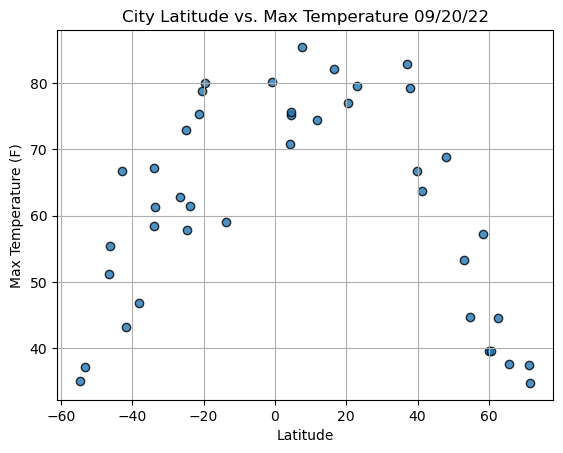

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

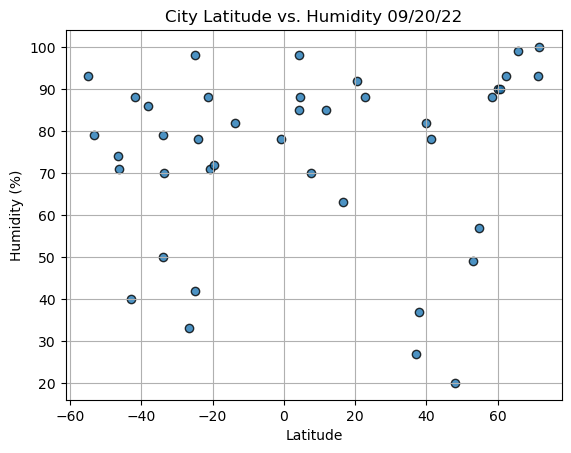

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

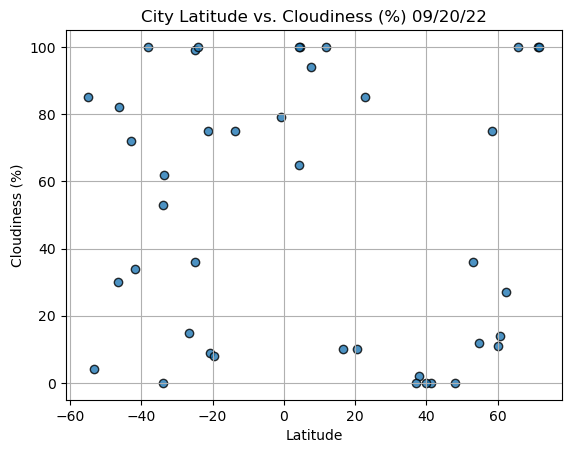

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


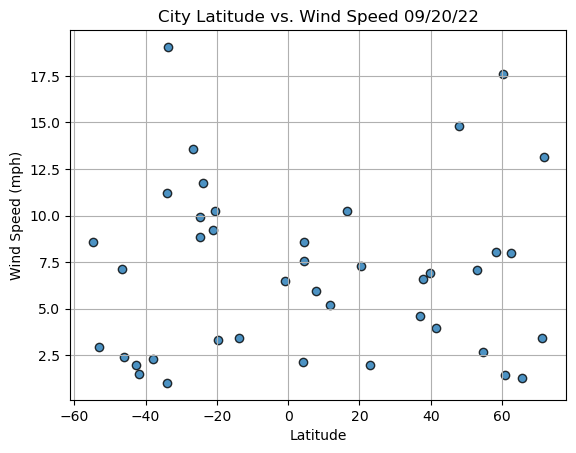

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [45]:
from scipy.stats import linregress
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
    regress_values = x_values*slope +intercept
    line_eq = 'y = '+str(round(slope,2))+"x + "+str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values,'r')
    plt.annotate(str(line_eq)+'\n rvalue= '+str(r_value),text_coordinates, fontsize=15,color='red')
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [46]:
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

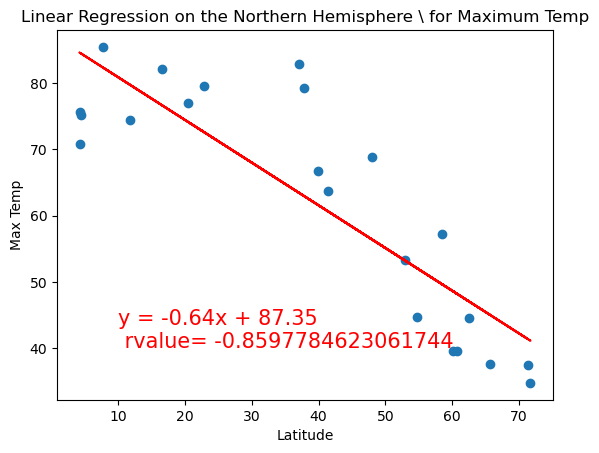

In [47]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plot_linear_regression(x_values,y_values,
                    'Linear Regression on the Northern Hemisphere \ for Maximum Temp', 'Max Temp', (10,40))

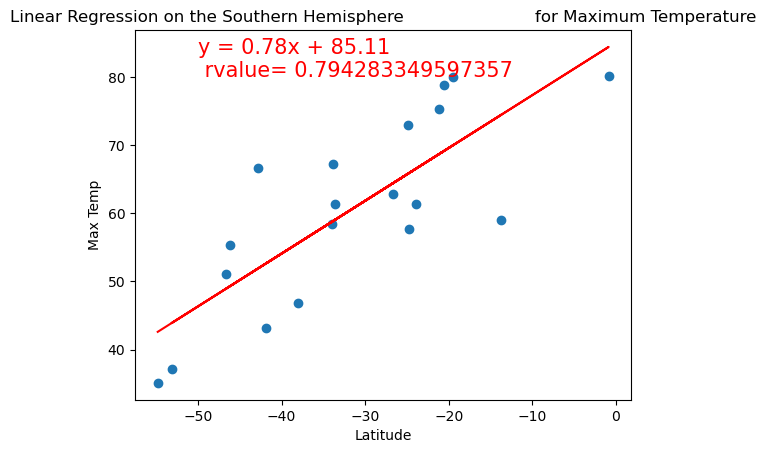

In [48]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

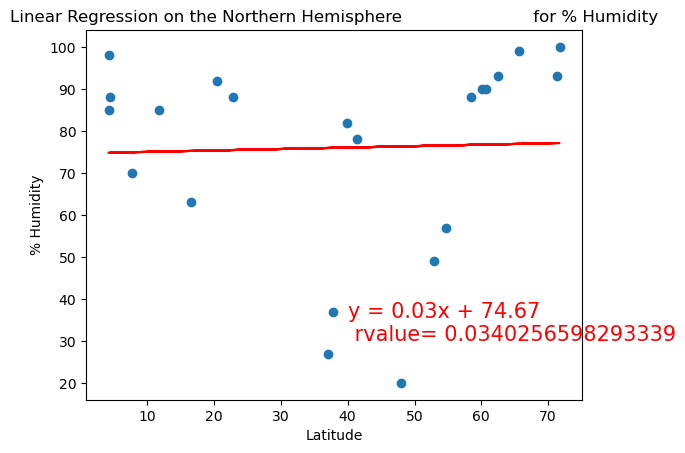

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,30))

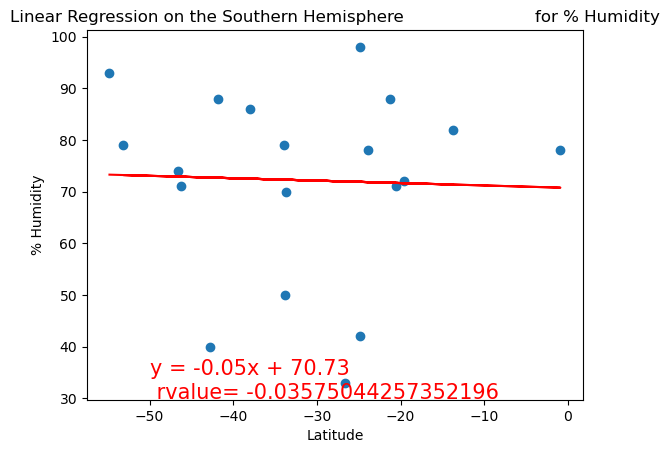

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,30))

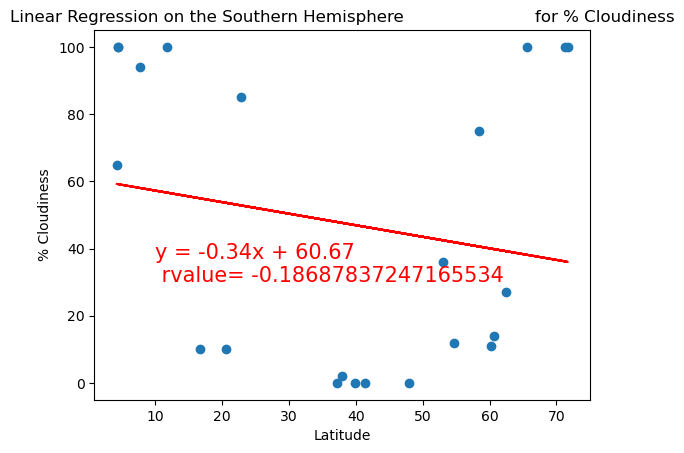

In [54]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,30))

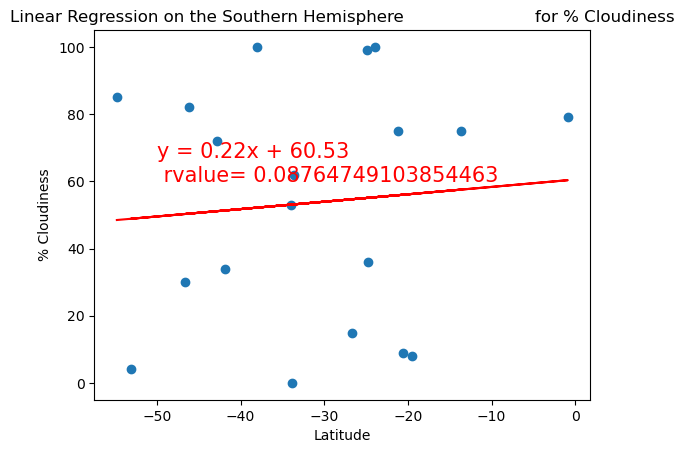

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

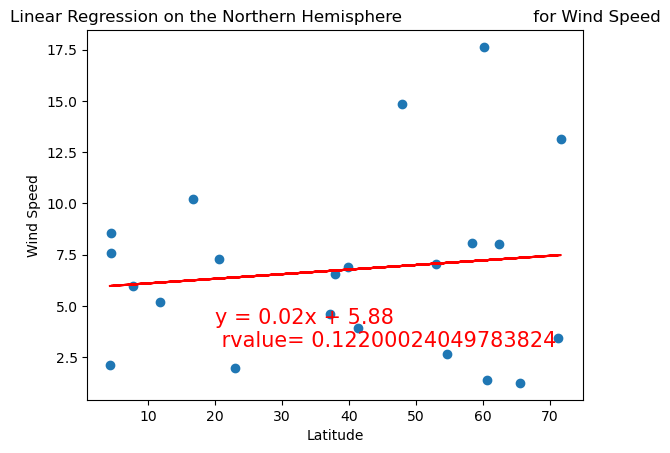

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(20,3))

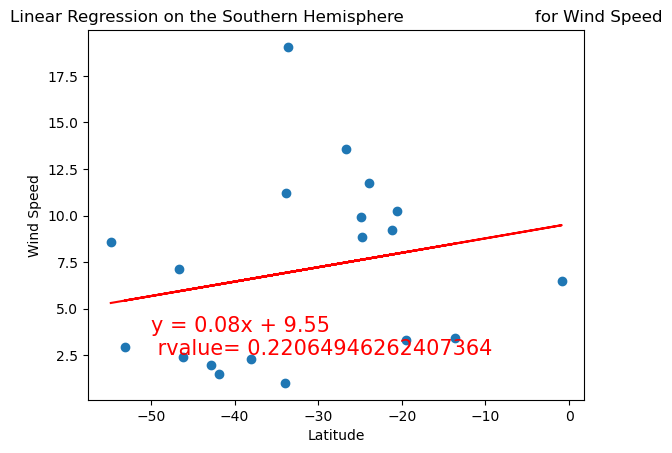

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,2.5))

In [61]:
ccity_weather = requests.get(city_url).json()

In [62]:
ccity_weather

{'coord': {'lon': -54.3833, 'lat': 4.25},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 72.32,
  'feels_like': 73.81,
  'temp_min': 72.32,
  'temp_max': 72.32,
  'pressure': 1011,
  'humidity': 97,
  'sea_level': 1011,
  'grnd_level': 1004},
 'visibility': 10000,
 'wind': {'speed': 2.46, 'deg': 65, 'gust': 12.03},
 'clouds': {'all': 20},
 'dt': 1663824566,
 'sys': {'country': 'GF', 'sunrise': 1663838813, 'sunset': 1663882423},
 'timezone': -10800,
 'id': 3381538,
 'name': 'Grand-Santi',
 'cod': 200}